## Ejercicio 1
Traslada la imagen 150 píxeles a la derecha y abajo. Busca la función de OpenCV
apropiada. Averigua qué argumentos se deben añadir para obtener algo así:

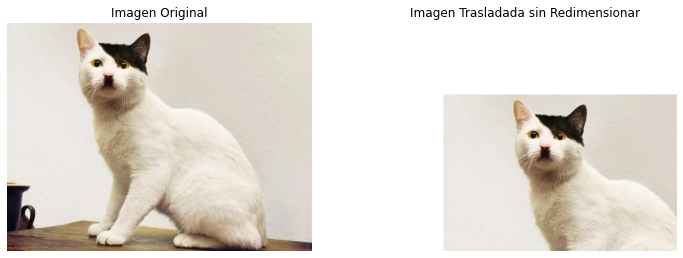

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
img = cv2.imread('imagen.jpg')

# Obtener el tamaño de la imagen
h, w = img.shape[:2]

# Definir la matriz de transformación para trasladar 200 píxeles a la derecha y abajo
M = np.float32([[1, 0, 150], [0, 1, 150]])  # Traslación de 200 píxeles

# Aplicar la transformación afín sin redimensionar la imagen
img_translated = cv2.warpAffine(img, M, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))  # Rellenar con blanco

# Mostrar la imagen original y la imagen trasladada
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_translated, cv2.COLOR_BGR2RGB))
plt.title('Imagen Trasladada sin Redimensionar')
plt.axis('off')

plt.show()


Realiza una transformación

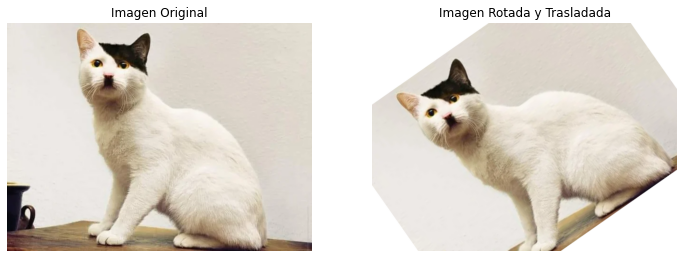

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
img = cv2.imread('imagen.jpg')

# Obtener el tamaño de la imagen
h, w = img.shape[:2]

# Definir el centro de la imagen
center = (w // 2, h // 2)

# Definir la matriz de transformación de rotación
# Ángulo de rotación (por ejemplo, 30 grados)
M = cv2.getRotationMatrix2D(center, 35, 1)  # Centro, ángulo y escala

# Aplicar la rotación
img_rotated = cv2.warpAffine(img, M, (w, h), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

# Mostrar la imagen original y la imagen rotada
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_rotated, cv2.COLOR_BGR2RGB))
plt.title('Imagen Rotada y Trasladada')
plt.axis('off')

plt.show()


Realiza una reflexión y una concatenación

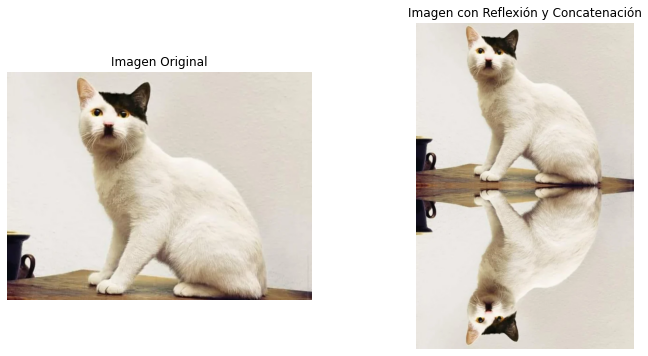

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
img = cv2.imread('imagen.jpg')

# Realizar la reflexión vertical (flip)
img_reflected = cv2.flip(img, 0)  # El valor 0 indica reflejar verticalmente

# Concatenar la imagen original con la reflejada en el eje vertical
img_concatenated = np.vstack((img, img_reflected))

# Mostrar la imagen original y la imagen con la reflexión
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_concatenated, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Reflexión y Concatenación')
plt.axis('off')

plt.show()


Realiza un abatimiento

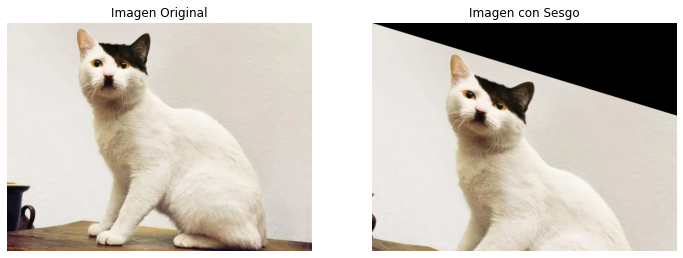

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
img = cv2.imread('imagen.jpg')

# Obtener las dimensiones de la imagen
h, w = img.shape[:2]

# Crear una matriz de transformación para sesgar la imagen
# La matriz de sesgo se utiliza para desplazar los píxeles en el eje X y Y en función del ángulo
M = np.float32([[1.15, -0.15, 0],  # Shear en el eje X
                           [0.35, 1, 0]])  # Shear en el eje Y

# Aplicar la transformación afín (sesgado)
img_skewed = cv2.warpAffine(img, M, (w, h))

# Mostrar la imagen original y la imagen con sesgo aplicado
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_skewed, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Sesgo')
plt.axis('off')

plt.show()


Recorta en la imagen original la cara del gato y aumenta el tamaño al doble. Usa los
argumentos apropiados de la función resize de OpenCV para explorar los distintos tipos de
interpolación vistos en clase.

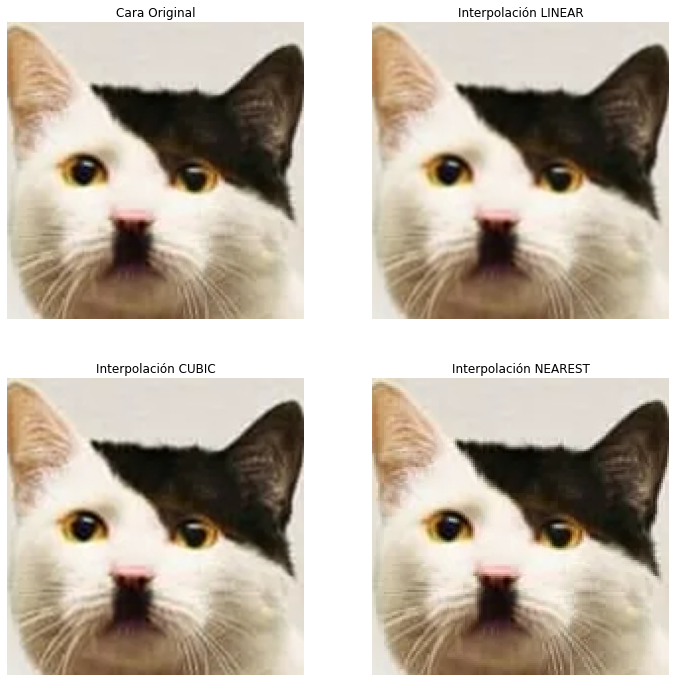

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la nueva imagen
img = cv2.imread('imagen.jpg')

# Definir la región de interés (ROI) para la cara del gato
# (Este recorte debe ajustarse manualmente según la imagen, supongamos que el área es un rectángulo)
x, y, w, h = 150, 10, 150, 150  # Coordenadas del recorte: x, y, ancho, alto
cat_face = img[y:y+h, x:x+w]

# Aumentar el tamaño al doble usando diferentes interpolaciones
res_linear = cv2.resize(cat_face, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
res_cubic = cv2.resize(cat_face, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
res_nearest = cv2.resize(cat_face, None, fx=2, fy=2, interpolation=cv2.INTER_NEAREST)

# Mostrar los resultados
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(cat_face, cv2.COLOR_BGR2RGB))
plt.title('Cara Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(res_linear, cv2.COLOR_BGR2RGB))
plt.title('Interpolación LINEAR')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(res_cubic, cv2.COLOR_BGR2RGB))
plt.title('Interpolación CUBIC')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(res_nearest, cv2.COLOR_BGR2RGB))
plt.title('Interpolación NEAREST')
plt.axis('off')

plt.show()


Interpolación LINEAR:
- Promedio de los píxeles vecinos.
- Da una imagen más suave y de buena calidad para escalados moderados.

Interpolación CUBIC:
- Usa una fórmula cúbica para calcular los nuevos píxeles.
- Proporciona resultados más suaves que LINEAR, pero es más costosa en términos de tiempo de cálculo.

Interpolación NEAREST:
- Simplemente selecciona el píxel más cercano sin hacer cálculos adicionales.
- Rápida, pero produce imágenes con bordes más duros y distorsionadas, especialmente cuando la imagen se agranda.

Dada la imagen documento.jpg, obtener una imagen en la que se visualice solo el
documento centrado, mediante una transformación proyectiva.

Para ello, usa que las coordenadas de los 4 puntos correspondientes a los vértices de la
imagen del texto son:
pts1 = np.float32([[320,140],[620,85],[395,520],[720,440]])

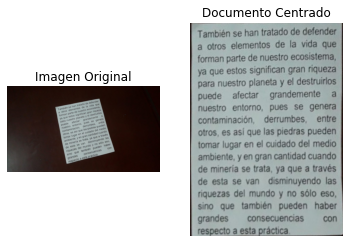

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen original
image = cv2.imread('documento.jpeg')

# Definir los puntos de entrada de los vértices del documento en la imagen original
pts1 = np.float32([[320, 140], [620, 85], [395, 520], [720, 440]])

# Definir los puntos de salida (donde queremos que el documento se coloque, es decir, una vista rectificada)
width = 500
height = 700
pts2 = np.float32([[0, 0], [width - 1, 0], [0, height - 1], [width - 1, height - 1]])

# Calcular la matriz de transformación proyectiva
matrix = cv2.getPerspectiveTransform(pts1, pts2)

# Aplicar la transformación proyectiva para obtener la imagen rectificada
result = cv2.warpPerspective(image, matrix, (width, height))

# Mostrar la imagen original y la imagen transformada
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Documento Centrado")
plt.axis('off')

plt.show()